In [47]:
# Packages:

import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [59]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Define the list of API endpoints
api_endpoints = ['CME', 'CMEAnalysis', 'GST', 'IPS', 'FLR', 'SEP', 'MPC', 'RBE', 'HSS']

# Define the common API parameters
api_key = 'BkLnefy3MaYDPAsNO1vUZxXTepcIjKWPdZzfW2UY'  # Replace with your NASA API key

# Calculate the start and end dates for the last 365 days
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Convert dates to the required format (YYYY-MM-DD)
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

# Create an empty dictionary to store the DataFrame objects
data_frames = {}

# Iterate over the API endpoints and import data into DataFrame objects
for endpoint in api_endpoints:
    # Define the API URL with the updated start and end dates
    url = f'https://api.nasa.gov/DONKI/{endpoint}'
    params = {
        'startDate': start_date_str,
        'endDate': end_date_str,
        'api_key': api_key
    }
    
    # Send GET request to the API
    response = requests.get(url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        try:
            # Parse the response as JSON
            data = response.json()
            
            # Convert the data into a DataFrame
            df = pd.DataFrame(data)
            
            # Store the DataFrame in the dictionary
            data_frames[endpoint] = df
        except ValueError as e:
            print(f'Error parsing JSON for endpoint {endpoint}:', e)
    else:
        print(f'Error for endpoint {endpoint}:', response.status_code)



In [60]:
for endpoint, df in data_frames.items():
    print(f"Data for endpoint: {endpoint}")
    print(df.head())
    print("\n")

Data for endpoint: CME
                    activityID      catalog          startTime sourceLocation  \
0  2022-07-31T01:25:00-CME-001  M2M_CATALOG  2022-07-31T01:25Z                  
1  2022-07-31T02:00:00-CME-001  M2M_CATALOG  2022-07-31T02:00Z                  
2  2022-07-31T06:48:00-CME-001  M2M_CATALOG  2022-07-31T06:48Z                  
3  2022-07-31T19:48:00-CME-001  M2M_CATALOG  2022-07-31T19:48Z                  
4  2022-07-31T23:12:00-CME-001  M2M_CATALOG  2022-07-31T23:12Z         N15E95   

   activeRegionNum                                               link  \
0              NaN  https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...   
1              NaN  https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...   
2              NaN  https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...   
3              NaN  https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...   
4              NaN  https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...   

                                                not

In [65]:
# Define the list of API endpoints
api_endpoints = ['CME', 'CMEAnalysis', 'GST', 'IPS', 'FLR', 'SEP', 'MPC', 'RBE', 'HSS']
                
# Define the common API parameters
api_key = 'BkLnefy3MaYDPAsNO1vUZxXTepcIjKWPdZzfW2UY'

# Calculate the start and end dates for the last 365 days
end_date = datetime.now()
start_date = end_date - timedelta(days=7)

# Convert dates to the required format (YYYY-MM-DD)
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

# Create an empty dictionary to store the DataFrame objects
df_7 = {}

# Iterate over the API endpoints and import data into DataFrame objects
for endpoint in api_endpoints:
    # Define the API URL with the updated start and end dates
    url = f'https://api.nasa.gov/DONKI/{endpoint}'
    params = {
        'startDate': start_date_str,
        'endDate': end_date_str,
        'api_key': api_key
    }
    
    # Send GET request to the API
    response = requests.get(url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        try:
            # Parse the response as JSON
            data = response.json()
            
            # Convert the data into a DataFrame
            df = pd.DataFrame(data)
            
            # Store the DataFrame in the dictionary
            df_7[endpoint] = df
        except ValueError as e:
            print(f'Error parsing JSON for endpoint {endpoint}:', e)
    else:
        print(f'Error for endpoint {endpoint}:', response.status_code)


Error parsing JSON for endpoint GST: Expecting value: line 1 column 1 (char 0)
Error parsing JSON for endpoint MPC: Expecting value: line 1 column 1 (char 0)


In [66]:
df_7.keys()

dict_keys(['CME', 'CMEAnalysis', 'IPS', 'FLR', 'SEP', 'RBE', 'HSS'])

In [63]:
# Convert the DataFrame timestamps to datetime objects
for endpoint, df in data_frames.items():
    if 'time' in df.columns:
        df['time'] = pd.to_datetime(df['time'])
    else:
        print(f"Warning: 'time' column not found in DataFrame for endpoint {endpoint}")

# Calculate the start and end dates for the last 30 days and last 7 days
end_date = datetime.now()
last_30_days_start = end_date - timedelta(days=30)
last_7_days_start = end_date - timedelta(days=7)

# Filter the DataFrames for the last 30 days
data_frames_last_30_days = {}
for endpoint, df in data_frames.items():
    if 'time' in df.columns:
        mask = (df['time'] >= last_30_days_start) & (df['time'] <= end_date)
        data_frames_last_30_days[endpoint] = df.loc[mask]
    else:
        print(f"Warning: 'time' column not found in DataFrame for endpoint {endpoint}")

# Filter the DataFrames for the last 7 days
data_frames_last_7_days = {}
for endpoint, df in data_frames.items():
    if 'time' in df.columns:
        mask = (df['time'] >= last_7_days_start) & (df['time'] <= end_date)
        data_frames_last_7_days[endpoint] = df.loc[mask]
    else:
        print(f"Warning: 'time' column not found in DataFrame for endpoint {endpoint}")


In [53]:
# Download all data from the DONKI API endpoint

# Define the list of API endpoints
api_endpoints = ['CME', 'CMEAnalysis', 'GST', 'IPS', 'FLR', 'SEP', 'MPC', 'RBE', 'HSS']

# Define the common API parameters
params = {
    'startDate': '2022-01-01',
    'endDate': '2022-12-31',
    'api_key': 'BkLnefy3MaYDPAsNO1vUZxXTepcIjKWPdZzfW2UY'  # Replace with your NASA API key
}

# Create an empty dictionary to store the DataFrame objects
data_frames = {}

# Iterate over the API endpoints and import data into DataFrame objects
for endpoint in api_endpoints:
    # Define the API URL
    url = f'https://api.nasa.gov/DONKI/{endpoint}'
    
    # Send GET request to the API
    response = requests.get(url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the response as JSON
        data = response.json()
        
        # Convert the data into a DataFrame
        df = pd.DataFrame(data)
        
        # Store the DataFrame in the dictionary
        data_frames[endpoint] = df
    else:
        print(f'Error for endpoint {endpoint}:', response.status_code)

In [7]:
# Convert the start time and end time columns to datetime format
flr_df['beginTime'] = pd.to_datetime(flr_df['beginTime'])
flr_df['endTime'] = pd.to_datetime(flr_df['endTime'])

# Calculate the duration of solar flares and add a new column
flr_df['duration'] = (flr_df['endTime'] - flr_df['beginTime']).dt.total_seconds() / 60

# Display the updated FLR DataFrame
print(flr_df)

                           flrID                                instruments  \
0    2022-01-01T07:07:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
1    2022-01-12T04:13:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
2    2022-01-13T20:24:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
3    2022-01-14T01:47:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
4    2022-01-14T13:07:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
..                           ...                                        ...   
299  2022-12-29T18:11:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
300  2022-12-29T18:26:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
301  2022-12-30T11:03:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
302  2022-12-30T15:24:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
303  2022-12-30T19:26:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   

                    beginTime           peakTime   

In [46]:
flr_df["instruments"]

0      [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
1      [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
2      [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
3      [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
4      [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
                         ...                    
299    [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
300    [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
301    [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
302    [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
303    [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
Name: instruments, Length: 304, dtype: object

In [65]:
flr_df['duration'].describe()

count     302.000000
mean       11.109272
std       333.924939
min     -5753.000000
25%        15.000000
50%        22.000000
75%        34.000000
max       239.000000
Name: duration, dtype: float64

In [67]:
# Find the index of the minimum value in the 'duration_minutes' column
min_index = flr_df['duration'].idxmin()
flr_df.iloc[min_index]

flrID                                    2022-10-12T16:26:00-FLR-001
instruments                [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
beginTime                                  2022-10-12 16:26:00+00:00
peakTime                                           2022-10-12T16:29Z
endTime                                    2022-10-08 16:33:00+00:00
classType                                                       C4.7
sourceLocation                                                N25W55
activeRegionNum                                              13112.0
linkedEvents         [{'activityID': '2022-10-12T17:12:00-CME-001'}]
link               https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...
duration                                                     -5753.0
Name: 223, dtype: object

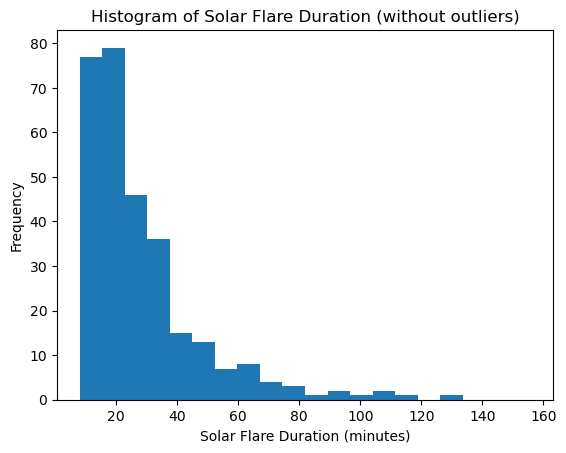

In [68]:
# Calculate the range of solar flare duration without outliers
lower_bound = flr_df['duration'].quantile(0.01)
upper_bound = flr_df['duration'].quantile(0.99)

# Create a histogram of the solar flare duration without outliers
plt.hist(flr_df['duration'], bins=20, range=(lower_bound, upper_bound))
plt.xlabel('Solar Flare Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Solar Flare Duration (without outliers)')
plt.show()


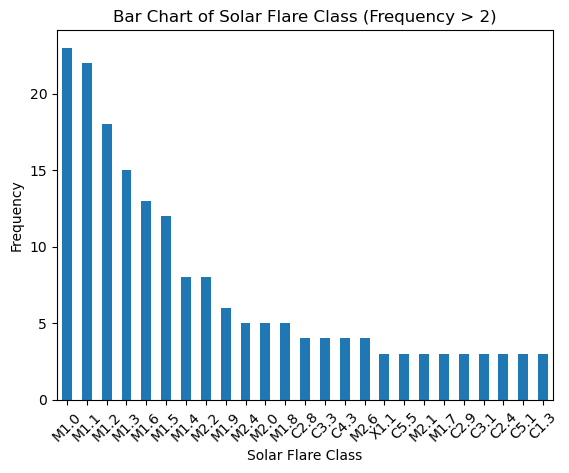

In [69]:
# Filter the DataFrame to include only rows with 'classType' values that occur more than 2 times
class_counts = flr_df['classType'].value_counts()
class_counts_filtered = class_counts[class_counts > 2]

# Create a bar chart of the filtered classType
class_counts_filtered.plot(kind='bar', rot=45)
plt.xlabel('Solar Flare Class')
plt.ylabel('Frequency')
plt.title('Bar Chart of Solar Flare Class (Frequency > 2)')
plt.show()


Mean CME Speed: 540.3026905829596
Maximum CME Speed: 2554.0
Minimum CME Speed: 134.0


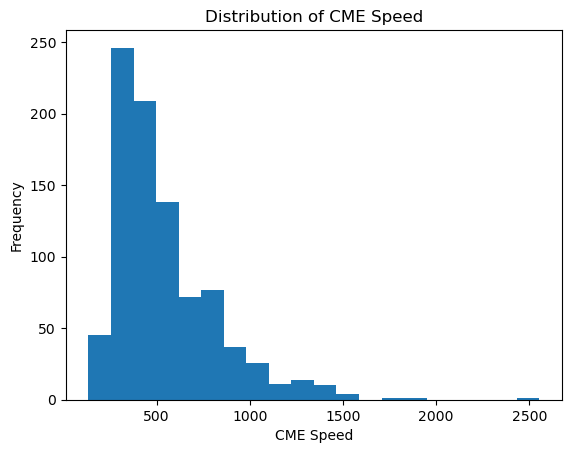

In [70]:
# Perform numeric analysis on CME data
cme_df = data_frames['CMEAnalysis']  # Retrieve the CME DataFrame from the data_frames dictionary
cme_speed_mean = cme_df['speed'].mean()
cme_speed_max = cme_df['speed'].max()
cme_speed_min = cme_df['speed'].min()

# Print the analysis results
print('Mean CME Speed:', cme_speed_mean)
print('Maximum CME Speed:', cme_speed_max)
print('Minimum CME Speed:', cme_speed_min)

# Plot the CME speed distribution
plt.hist(cme_df['speed'], bins=20)
plt.xlabel('CME Speed')
plt.ylabel('Frequency')
plt.title('Distribution of CME Speed')
plt.show()

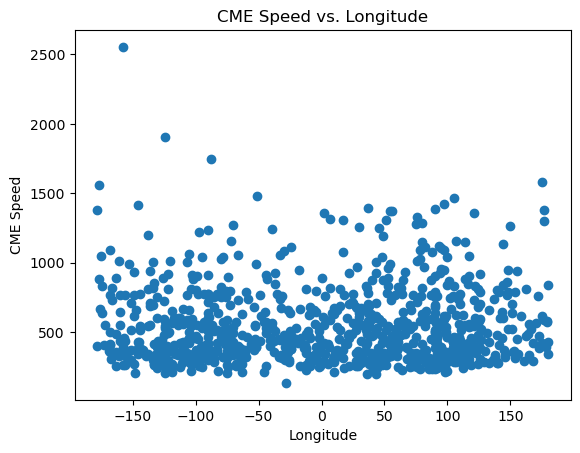

In [26]:
# Create a scatter plot of CME speed vs. longitude
plt.scatter(cme_df['longitude'], cme_df['speed'])
plt.xlabel('Longitude')
plt.ylabel('CME Speed')
plt.title('CME Speed vs. Longitude')
plt.show()

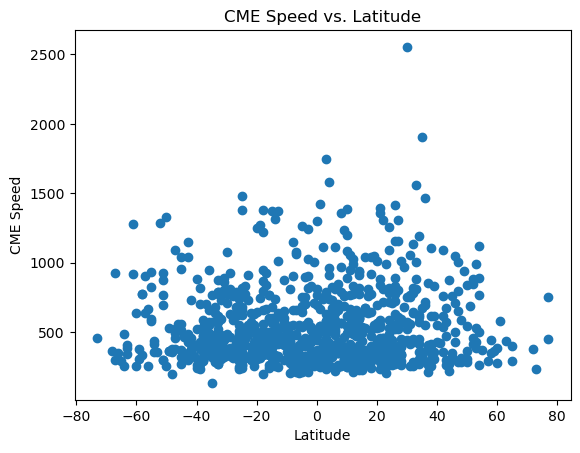

In [27]:
# Create a scatter plot of CME speed vs. Latitude
plt.scatter(cme_df['latitude'], cme_df['speed'])
plt.xlabel('Latitude')
plt.ylabel('CME Speed')
plt.title('CME Speed vs. Latitude')
plt.show()

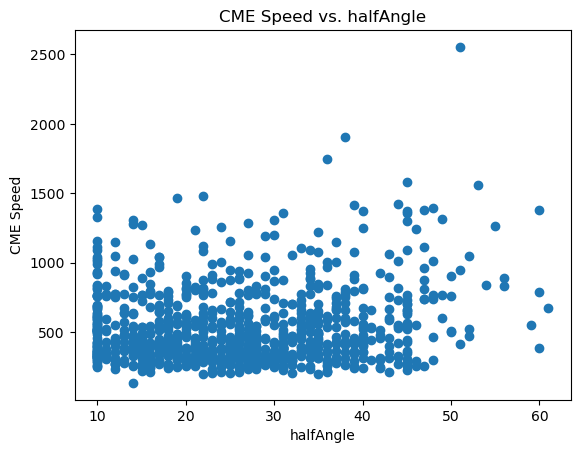

In [28]:
# Create a scatter plot of CME speed vs. Half Angle
plt.scatter(cme_df['halfAngle'], cme_df['speed'])
plt.xlabel('halfAngle')
plt.ylabel('CME Speed')
plt.title('CME Speed vs. halfAngle')
plt.show()